# Mercedes-Benz Greener Manufacturing

<b>Name:</b> Princewill Eneh

<b>Date: </b> March 15, 2018

# Step 1: Define the Problem

<b>Project Summary:</b>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

# Step 2: Gather the Data

The dataset is also given to us on a golden plater with test and train data at 

# Step 3: Prepare Data for Consumption

## 3.1 Import Libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line.

In [214]:
# load packages
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import gc
import IPython
from IPython import display
import sklearn
from sklearn import preprocessing
import xgboost as xgb

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
print(check_output(["ls", "../Mercedes Benz/input"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



## 3.11 Load Data Modeling Libraries

We will use the popular *scikit-learn* library to develop our machine learning algorithms. In *sklearn,* algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the *matplotlib* and *seaborn* library. Below are common classes to load.

In [172]:
# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier,XGBRegressor

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12, 8

## 3.2 Meet and Greet Data

This is the meet and greet step. Get to know your data by first name and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals in life (dependent/target variable(s)). Think of it like a first date, before you jump in and start poking it in the bedroom.


In [173]:
train = pd.read_csv('../Mercedes Benz/input/train.csv')
test = pd.read_csv('../Mercedes Benz/input/test.csv')

#### 3.21 Data Summary

In [174]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [176]:
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [177]:
train.select_dtypes(include=['object']).head(0)

,X0,X1,X2,X3,X4,X5,X6,X8


In [178]:
train.X0.value_counts().count()

47

In [179]:
train.X1.value_counts().count()

27

In [180]:
train.X2.value_counts().count()

44

In [181]:
train.X3.value_counts().count()

7

In [182]:
train.X4.value_counts().count()

4

In [183]:
train.X5.value_counts().count()

29

In [184]:
train.X6.value_counts().count()

12

In [185]:
train.X8.value_counts().count()

25

In [186]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [187]:
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  3.21 Completing (Missing Data)

#### Remove Outliers

In [188]:
train[train.y > 200]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


In [189]:
train.drop(883, axis=0, inplace=True)

In [190]:
train[train.y > 200]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


#### Checking for missing data

In [191]:
# Technique 1
# Check for Missing data
train.isnull().any().any()

False

# Step 4: Perform Exploratory Analysis with Statistics

## 4.1 Visualizations

#### Target variable 

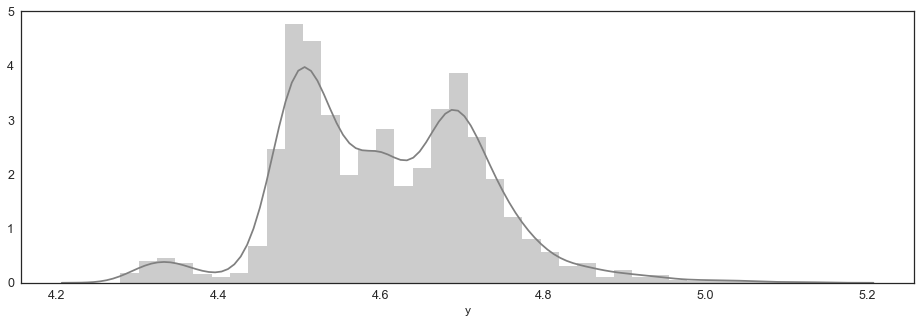

In [192]:
f, ax = plt.subplots(figsize = (16,5))
sns.distplot(np.log(train.y), color= 'gray')

#### Target vs Categorical variables

##### For Continous Target

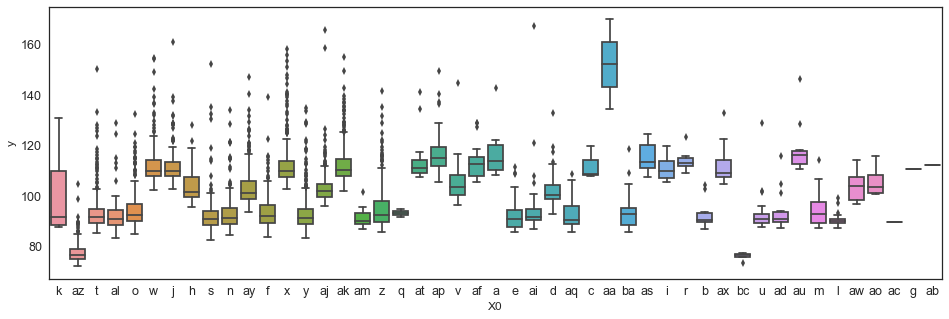

In [193]:
#box plot overallqual/saleprice
var = 'X0'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

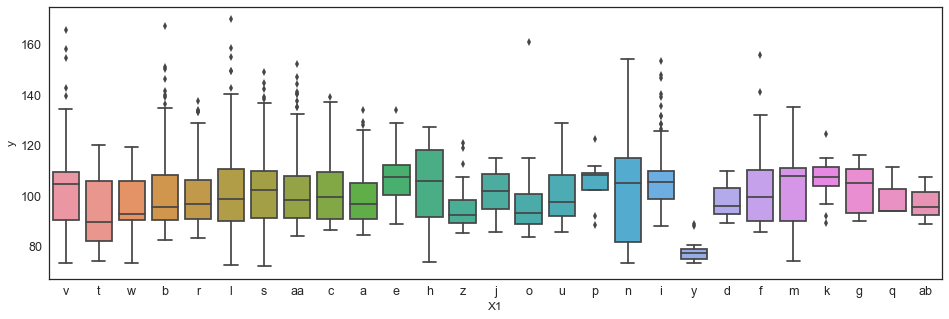

In [194]:
#box plot overallqual/saleprice
var = 'X1'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

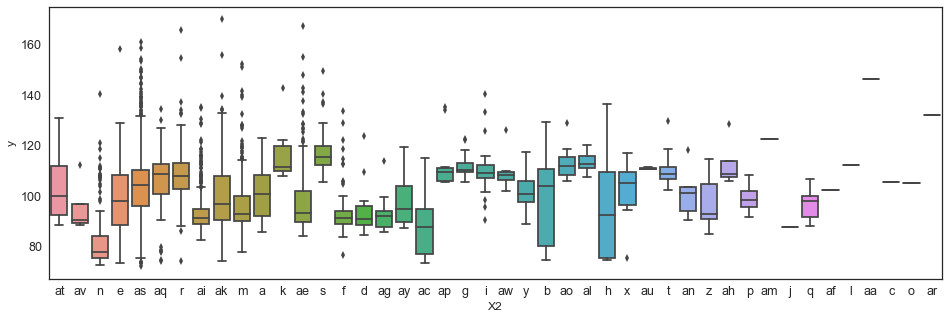

In [195]:
#box plot overallqual/saleprice
var = 'X2'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

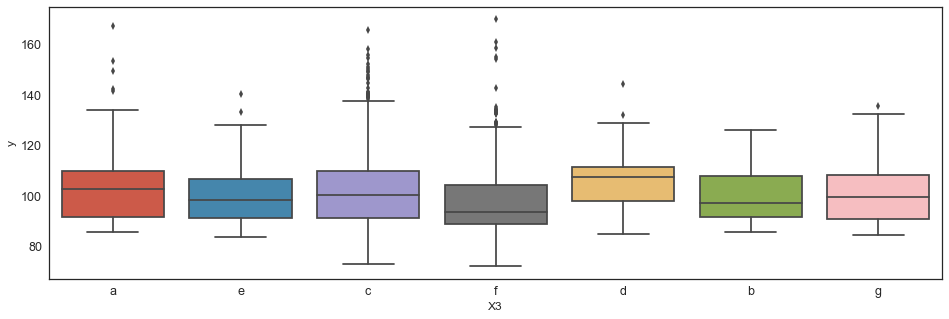

In [196]:
#box plot overallqual/saleprice
var = 'X3'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

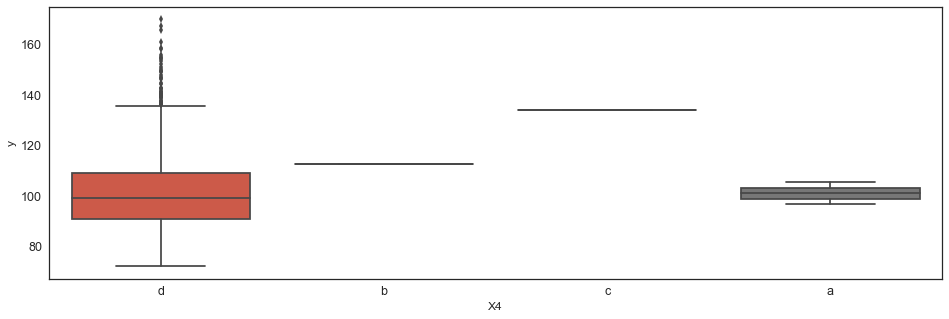

In [197]:
#box plot overallqual/saleprice
var = 'X4'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

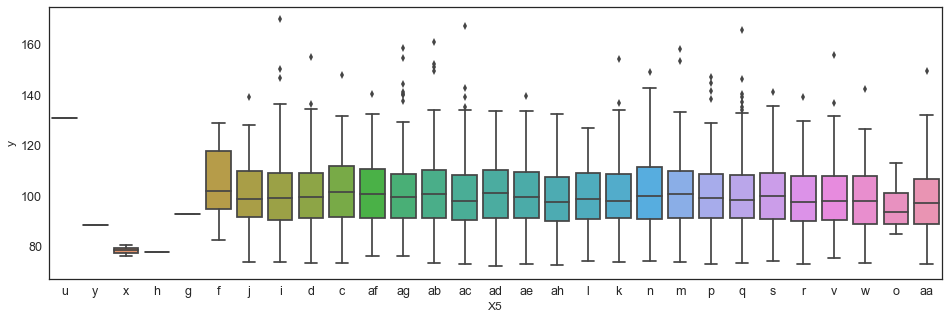

In [198]:
#box plot overallqual/saleprice
var = 'X5'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

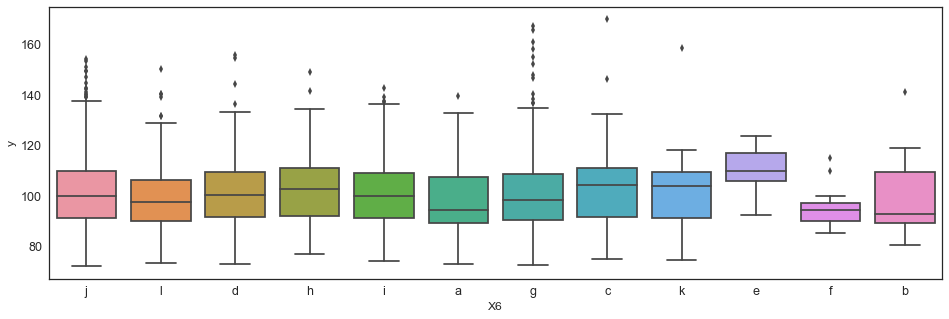

In [199]:
#box plot overallqual/saleprice
var = 'X6'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

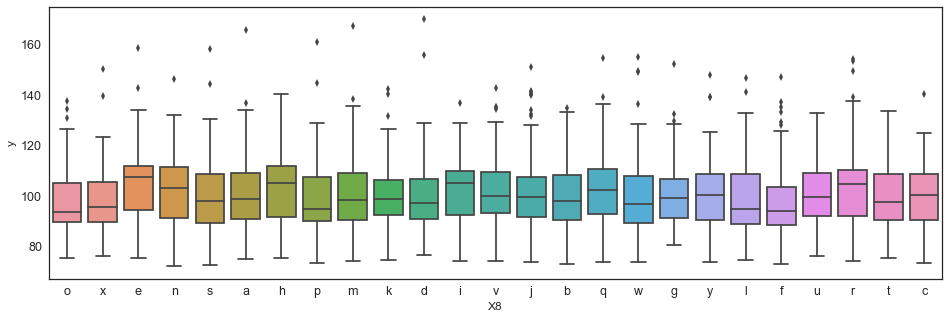

In [200]:
#box plot overallqual/saleprice
var = 'X8'
data = pd.concat([train['y'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(16,5))
fig = sns.boxplot(x=var, y="y", data=data)

#### Target vs Numerical variables

##### For Continous Target

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

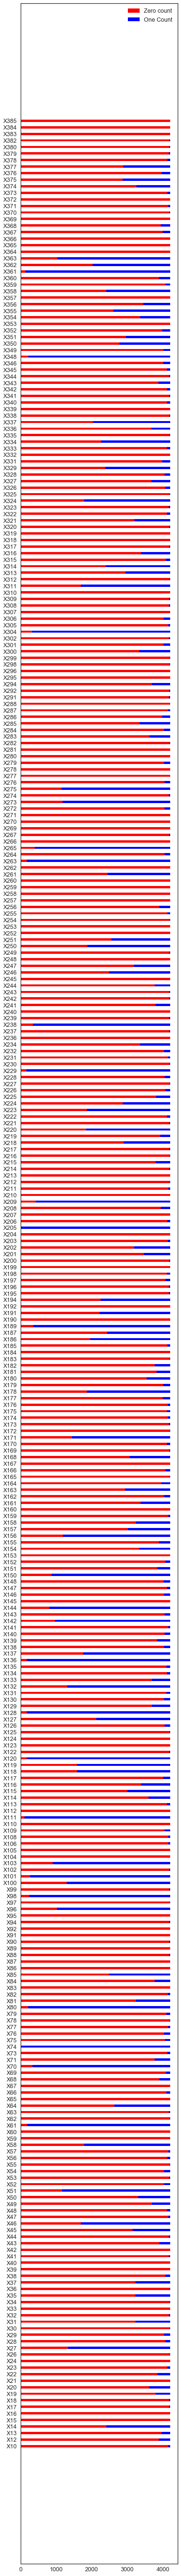

In [201]:
unique_values_dict = {}
for col in train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")
        
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train[col]==0).sum())
    one_count_list.append((train[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

#### Correlation Plots

##### For Continous Target

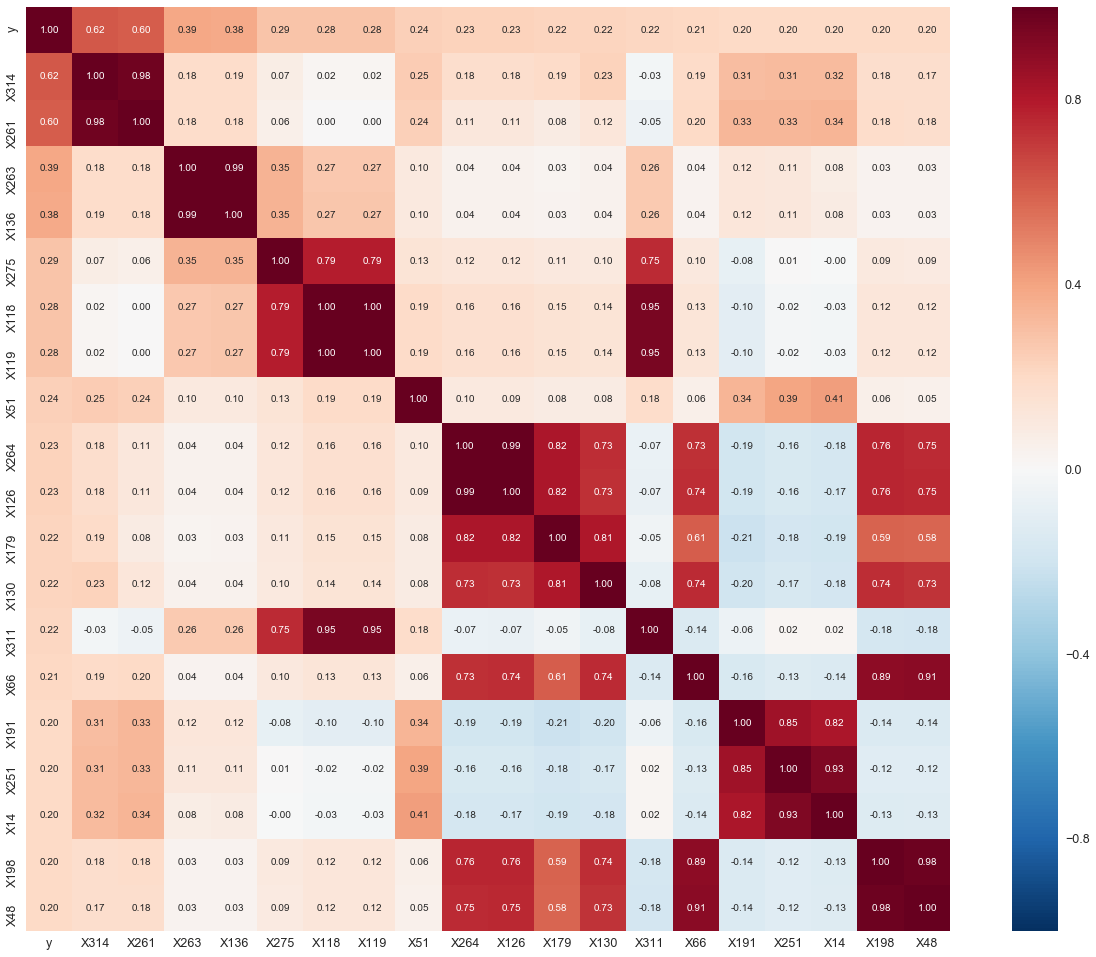

In [202]:
#<target> correlation matrix zoomed in
corrmat = train.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 17))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

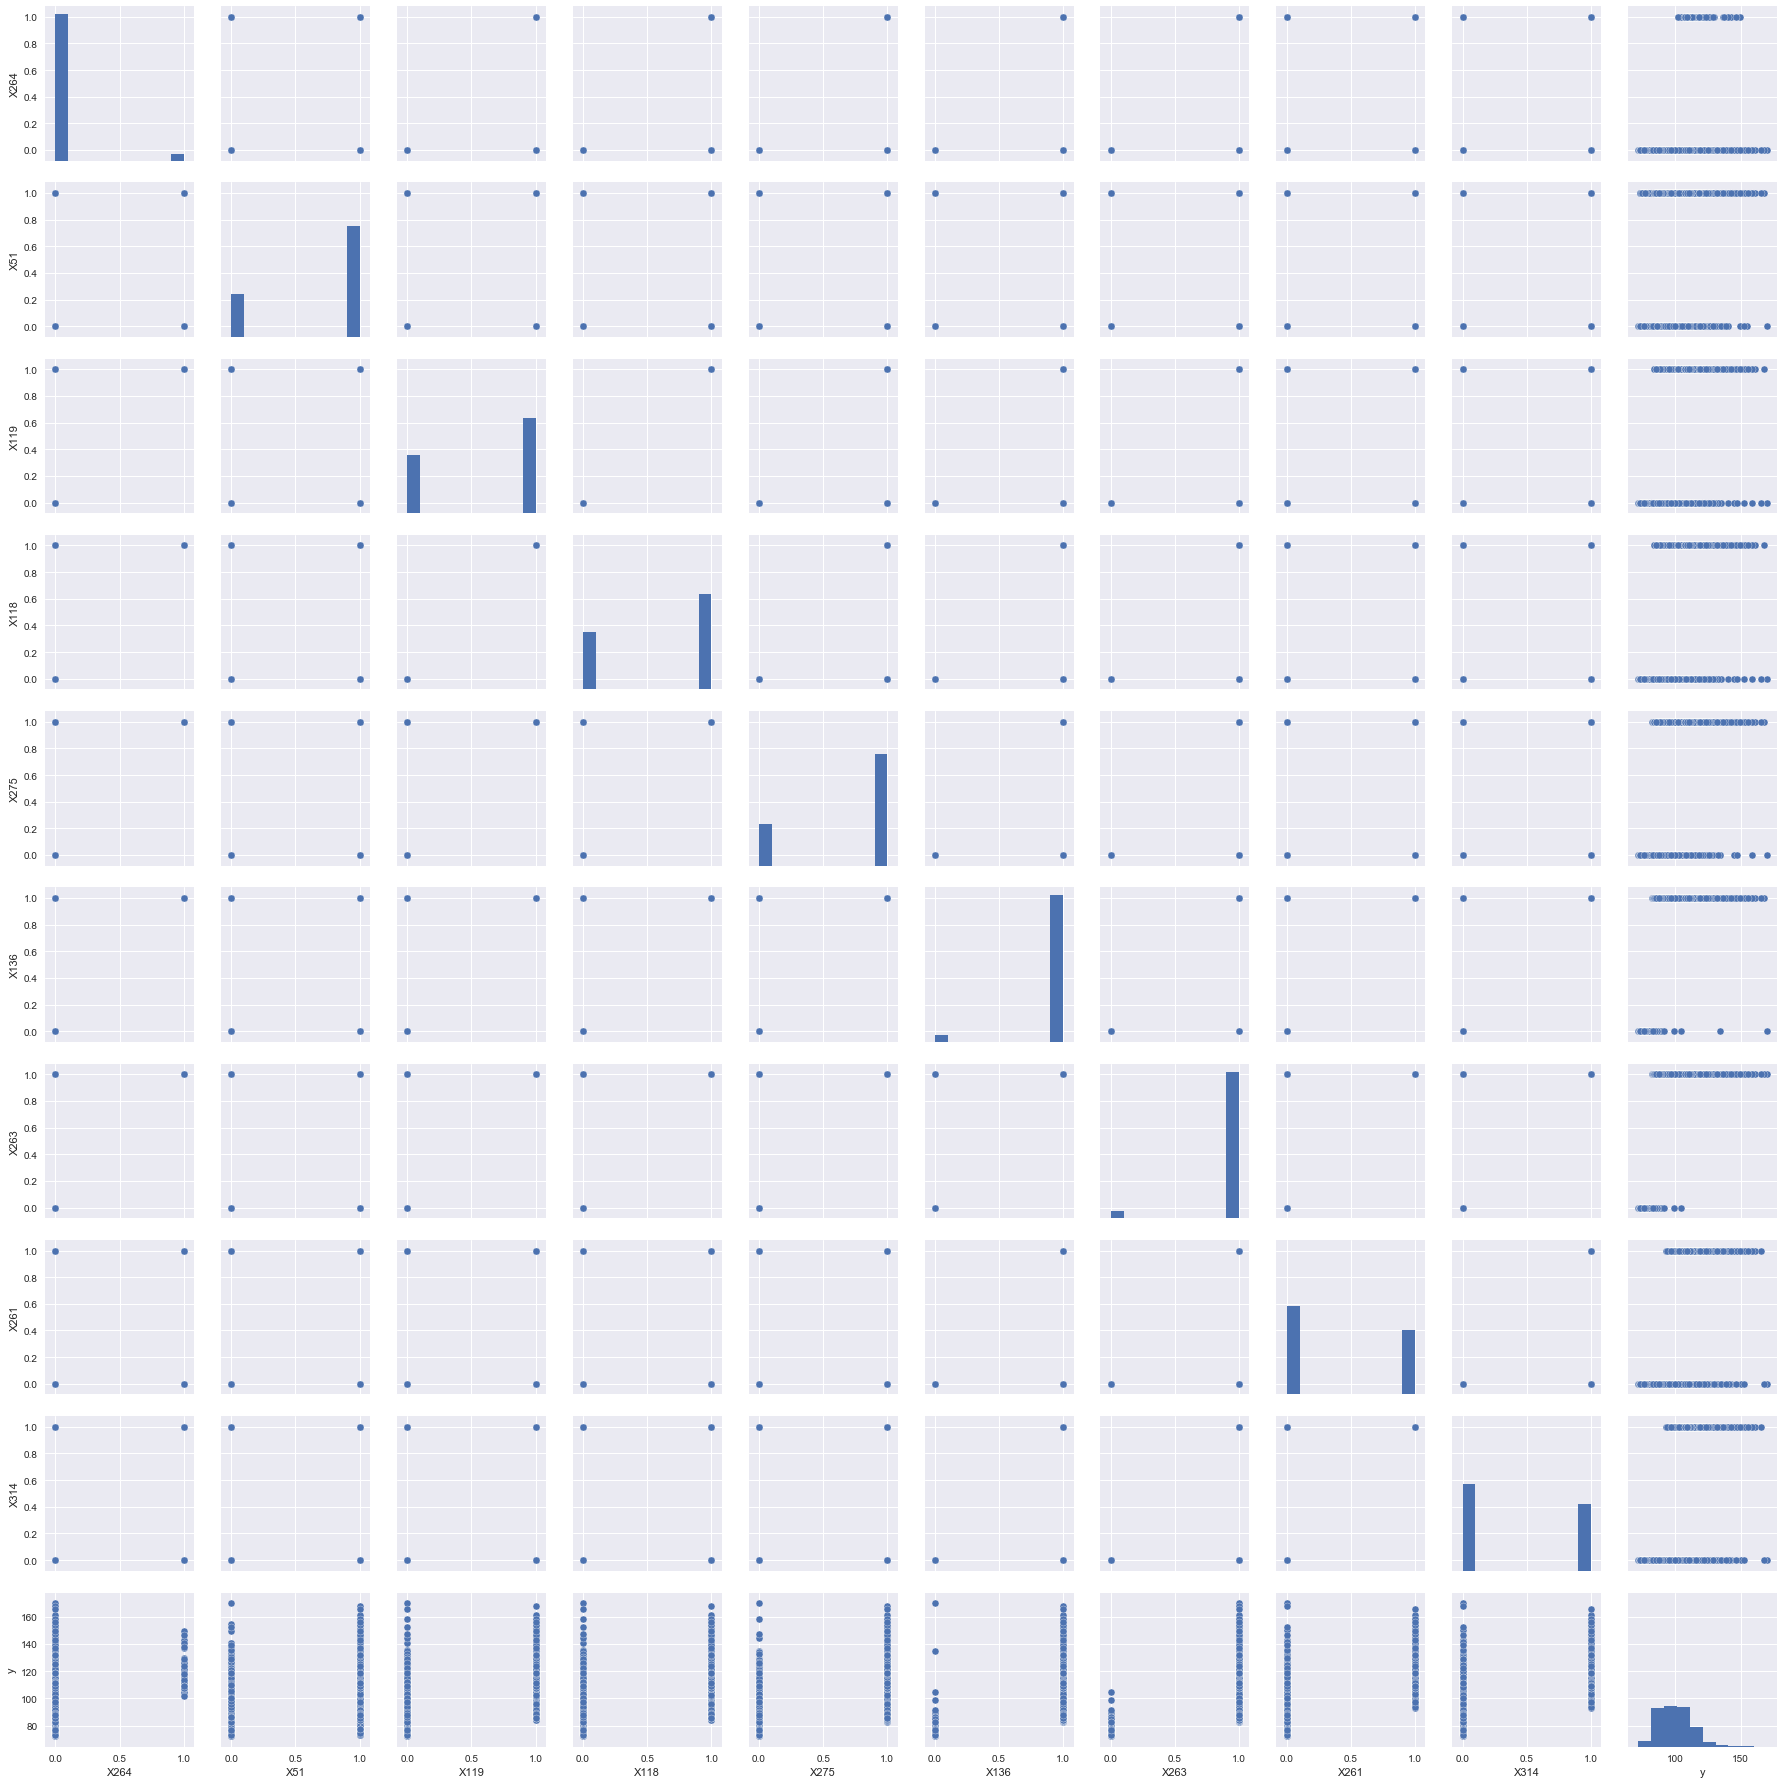

In [74]:
#scatterplot
sns.set()
cols = ['X264', 'X51', 'X119', 'X118', 'X275','X136','X263','X261','X314','y']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## 4.2 Creating (Feature Engineering)

#### combining

#### clusters

#### binning

## 4.3 Converting (Format Transformations) 

#### Dummy Variables

In [203]:
# Get all columns with datatype object. Check to see if there are object types that might have been converted to ints.
categorical = train.select_dtypes(include=['object']).columns.tolist()

In [204]:
categorical

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [205]:
# CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

# code categorical data
label = LabelEncoder()

for column in categorical:
    train[column + '_Code'] = label.fit_transform(train[column])

In [206]:
Encoded_categorical = train.filter(like='_Code').columns

In [207]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
train = pd.get_dummies(
    train, columns=Encoded_categorical, drop_first=True)

In [208]:
# drop categorical columns.
train.drop(categorical, axis=1, inplace=True)

#### Normalization/Feature scaling

In [112]:
#  Get a list of columns to normalize
columns_to_normalize = train.columns

In [113]:
columns_to_normalize

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X8_Code_15', 'X8_Code_16', 'X8_Code_17', 'X8_Code_18', 'X8_Code_19',
       'X8_Code_20', 'X8_Code_21', 'X8_Code_22', 'X8_Code_23', 'X8_Code_24'],
      dtype='object', length=555)

In [114]:
# Apply Min Max normalization
train[columns_to_normalize] = train[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## 4.4 Feature selection (PCA, variance threshold)



#### PCA

Note: Perform PCA when you see coolinearity amongst dimensions in the dataset

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use <b>StandardScaler</b> to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
# only standardize dependent variables
x = StandardScaler().fit_transform(train) # data set minus the target

In [ ]:
# project PCA to 2D 
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, train[['target']]], axis = 1)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'], c=color, s=50)
ax.legend(targets)
ax.grid()

<b>Explained Variance¶</b>
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
pca.explained_variance_ratio_

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

<b>What are the limitations of PCA?¶</b><br>
PCA is not scale invariant. check: we need to scale our data first.<br>
The directions with largest variance are assumed to be of the most interest<br>
Only considers orthogonal transformations (rotations) of the original variables<br>
PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.<br>
If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

In [ ]:
# OR let PCA determine the number of components that will retain  95% of information
pca = PCA(.95)

#### Varience Threshold

#### Put Target variable in y

In [ ]:
y = train['<target>']

# Step 5: Build Model

## 5.00 Split Training and Testing Data

In [210]:
y = train.y

In [211]:
train.drop(['y','ID'],axis=1,inplace=True)

In [212]:
# split train and test data with function defaults
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=0)

## 5.10 Run Model

#### Initialization

##### Simple

 <b> Linear Regression</b>

In [103]:
linreg = linear_model.LinearRegression()

In [104]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-7.85481751047e+12
[  1.20337600e+10  -2.26236520e+12  -7.14677313e+12   1.52212318e+12
  -7.14677313e+12  -2.42995368e+13   4.14455614e+12  -2.65541578e+12
  -7.14677313e+12  -7.14677313e+12  -7.14677313e+12  -2.36877694e+12
  -7.14677313e+12   1.31984112e+13  -3.04939082e+12   3.45575609e+11
   2.12402344e-01  -1.12824245e+10   1.79883186e+13   2.05585430e+13
   1.91462096e+13  -1.67067422e+13   4.42746704e+12   1.20337600e+10
  -1.20369555e+13   1.32872979e+13  -7.10925413e+12  -1.37084961e-01
  -3.95904974e+12   2.22957759e+11   2.22957759e+11  -4.63592529e-01
   1.44276253e+13  -2.26967151e+13  -3.95275879e+00   3.66699219e-01
   7.79779053e+00   7.03077509e+12   5.93164062e+00   1.04003906e-01
  -3.21289062e-01  -1.39014485e+13   1.77727048e+12  -1.72724642e+13
  -7.33978271e-01   6.39587402e-01   5.64666748e-01   3.45058562e+13
  -7.28395347e+12  -4.49134519e+11  -8.26444172e+12   2.96585467e+12
   1.80211826e+12  -4.26635742e-01  -1.95200348e+00   2.84546000e+12
   6.32527833e+

In [106]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

 <b> XGBoost</b>

In [215]:
xmodel = xgb.XGBRegressor()

In [216]:
xmodel.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [217]:
y_pred = xmodel.predict(X_test)

#### Important Variables

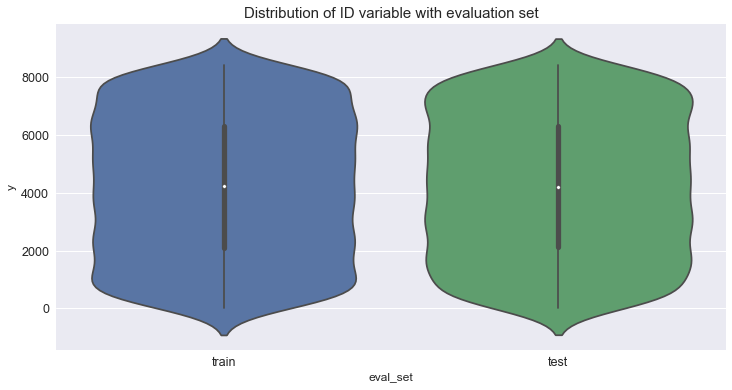

In [161]:
plt.figure(figsize=(6,10))
train['eval_set'] = "train"
test['eval_set'] = "test"
full_df = pd.concat([train[["ID","eval_set"]], test[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

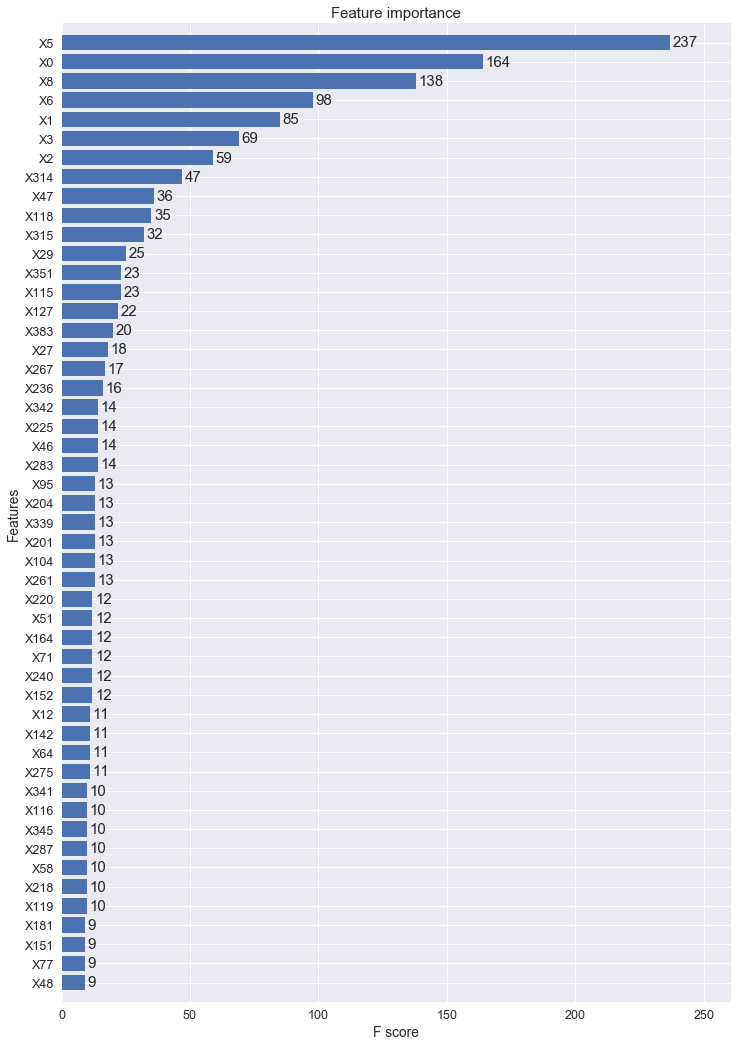

In [162]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
        
train_y = train['y'].values
train_X = train.drop(["ID", "y", "eval_set"], axis=1)

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## 5.11 Evaluate Model Performance
Determine a Baseline Accuracy 

#### For Regression

In [108]:
# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(y_test, y_pred))

63489592603.6


In [109]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

9.70822491408e+23


In [110]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

985303248451.0


In [111]:
# Calculate Rsquared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-6.4139240324192503e+21

#### For XGBoost

In [218]:
# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(y_test, y_pred))

5.32595550273


In [219]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

63.1177164171


In [220]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

7.94466590972


In [221]:
# Calculate Rsquared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.58300076297966241

## 5.12 Tune Model with Hyper-Parameters
We will tune our model using [ParameterGrid](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and customized [sklearn scoring](http://scikit-learn.org/stable/modules/model_evaluation.html); [click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/). We will then visualize our tree with [graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). [Click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/).


In [ ]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data1[data1_x_bin], data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)


## 5.13 Tune Model with Feature Selection
As stated in the beginning, more predictor variables do not make a better model, but the right predictors do. So another step in data modeling is feature selection. [Sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has several options, we will use [recursive feature elimination (RFE) with cross validation (CV)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV).

In [ ]:
#base model
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)



#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv  = cv_split)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(data1[X_rfe], data1[Target])

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

In [ ]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

# Step 6: Validate and Implement 

In [ ]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

In [ ]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)


In [ ]:
#IMPORTANT: THIS SECTION IS UNDER CONSTRUCTION!!!! 12.24.17
#UPDATE: This section was scrapped for the next section; as it's more computational friendly.

#WARNING: Running is very computational intensive and time expensive
#code is written for experimental/developmental purposes and not production ready


#tune each estimator before creating a super model
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [50,100,300]
grid_ratio = [.1,.25,.5,.75,1.0]
grid_learn = [.01,.03,.05,.1,.25]
grid_max_depth = [2,4,6,None]
grid_min_samples = [5,10,.03,.05,.10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

vote_param = [{
#            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'ada__n_estimators': grid_n_estimator,
            'ada__learning_rate': grid_ratio,
            'ada__algorithm': ['SAMME', 'SAMME.R'],
            'ada__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'bc__n_estimators': grid_n_estimator,
            'bc__max_samples': grid_ratio,
            'bc__oob_score': grid_bool, 
            'bc__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'etc__n_estimators': grid_n_estimator,
            'etc__criterion': grid_criterion,
            'etc__max_depth': grid_max_depth,
            'etc__random_state': grid_seed,


            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            'gbc__loss': ['deviance', 'exponential'],
            'gbc__learning_rate': grid_ratio,
            'gbc__n_estimators': grid_n_estimator,
            'gbc__criterion': ['friedman_mse', 'mse', 'mae'],
            'gbc__max_depth': grid_max_depth,
            'gbc__min_samples_split': grid_min_samples,
            'gbc__min_samples_leaf': grid_min_samples,      
            'gbc__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'rfc__n_estimators': grid_n_estimator,
            'rfc__criterion': grid_criterion,
            'rfc__max_depth': grid_max_depth,
            'rfc__min_samples_split': grid_min_samples,
            'rfc__min_samples_leaf': grid_min_samples,   
            'rfc__bootstrap': grid_bool,
            'rfc__oob_score': grid_bool, 
            'rfc__random_state': grid_seed,
        
            #http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'lr__fit_intercept': grid_bool,
            'lr__penalty': ['l1','l2'],
            'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'lr__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'bnb__alpha': grid_ratio,
            'bnb__prior': grid_bool,
            'bnb__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'knn__n_neighbors': [1,2,3,4,5,6,7],
            'knn__weights': ['uniform', 'distance'],
            'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'knn__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'svc__C': grid_max_depth,
            'svc__gamma': grid_ratio,
            'svc__decision_function_shape': ['ovo', 'ovr'],
            'svc__probability': [True],
            'svc__random_state': grid_seed,
    
    
            #http://xgboost.readthedocs.io/en/latest/parameter.html
            'xgb__learning_rate': grid_ratio,
            'xgb__max_depth': [2,4,6,8,10],
            'xgb__tree_method': ['exact', 'approx', 'hist'],
            'xgb__objective': ['reg:linear', 'reg:logistic', 'binary:logistic'],
            'xgb__seed': grid_seed    

        }]




#Soft Vote with tuned models
#grid_soft = model_selection.GridSearchCV(estimator = vote_soft, param_grid = vote_param, cv = 2, scoring = 'roc_auc')
#grid_soft.fit(data1[data1_x_bin], data1[Target])

#print(grid_soft.cv_results_.keys())
#print(grid_soft.cv_results_['params'])
#print('Soft Vote Tuned Parameters: ', grid_soft.best_params_)
#print(grid_soft.cv_results_['mean_train_score'])
#print("Soft Vote Tuned Training w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(grid_soft.cv_results_['mean_test_score'])
#print("Soft Vote Tuned Test w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_test_score'][tune_model.best_index_]*100))
#print("Soft Vote Tuned Test w/bin score 3*std: +/- {:.2f}". format(grid_soft.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
#print('-'*10)


#credit: https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/
#cv_keys = ('mean_test_score', 'std_test_score', 'params')
#for r, _ in enumerate(grid_soft.cv_results_['mean_test_score']):
#    print("%0.3f +/- %0.2f %r"
#          % (grid_soft.cv_results_[cv_keys[0]][r],
#             grid_soft.cv_results_[cv_keys[1]][r] / 2.0,
#             grid_soft.cv_results_[cv_keys[2]][r]))


#print('-'*10)


In [ ]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

In [ ]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)


#12/31/17 tuned with data1_x_bin
#The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 33.39 seconds.
#The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 30.28 seconds.
#The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 64.76 seconds.
#The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 34.35 seconds.
#The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 76.32 seconds.
#The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 6.01 seconds.
#The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'liblinear'} with a runtime of 8.04 seconds.
#The best parameter for BernoulliNB is {'alpha': 0.1} with a runtime of 0.19 seconds.
#The best parameter for GaussianNB is {} with a runtime of 0.04 seconds.
#The best parameter for KNeighborsClassifier is {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'uniform'} with a runtime of 4.84 seconds.
#The best parameter for SVC is {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with a runtime of 29.39 seconds.
#The best parameter for XGBClassifier is {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0} with a runtime of 46.23 seconds.
#Total optimization time was 5.56 minutes.

In [ ]:
#prepare data for modeling
print(data_val.info())
print("-"*10)
#data_val.sample(10)



#handmade decision tree - submission score = 0.77990
data_val['Survived'] = mytree(data_val).astype(int)


#decision tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_dt = tree.DecisionTreeClassifier()
#submit_dt = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
#submit_dt.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_dt.best_params_) #Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
#data_val['Survived'] = submit_dt.predict(data_val[data1_x_bin])


#bagging w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77990
#submit_bc = ensemble.BaggingClassifier()
#submit_bc = model_selection.GridSearchCV(ensemble.BaggingClassifier(), param_grid= {'n_estimators':grid_n_estimator, 'max_samples': grid_ratio, 'oob_score': grid_bool, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_bc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_bc.best_params_) #Best Parameters:  {'max_samples': 0.25, 'n_estimators': 500, 'oob_score': True, 'random_state': 0}
#data_val['Survived'] = submit_bc.predict(data_val[data1_x_bin])


#extra tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_etc = ensemble.ExtraTreesClassifier()
#submit_etc = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_etc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_etc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_etc.predict(data_val[data1_x_bin])


#random foreset w/full dataset modeling submission score: defaults= 0.71291, tuned= 0.73205
#submit_rfc = ensemble.RandomForestClassifier()
#submit_rfc = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_rfc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_rfc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_rfc.predict(data_val[data1_x_bin])



#ada boosting w/full dataset modeling submission score: defaults= 0.74162, tuned= 0.75119
#submit_abc = ensemble.AdaBoostClassifier()
#submit_abc = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(), param_grid={'n_estimators': grid_n_estimator, 'learning_rate': grid_ratio, 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_abc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_abc.best_params_) #Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0}
#data_val['Survived'] = submit_abc.predict(data_val[data1_x_bin])


#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
#submit_gbc = ensemble.GradientBoostingClassifier()
#submit_gbc = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid={'learning_rate': grid_ratio, 'n_estimators': grid_n_estimator, 'max_depth': grid_max_depth, 'random_state':grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_gbc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_gbc.best_params_) #Best Parameters:  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
#data_val['Survived'] = submit_gbc.predict(data_val[data1_x_bin])

#extreme boosting w/full dataset modeling submission score: defaults= 0.73684, tuned= 0.77990
#submit_xgb = XGBClassifier()
#submit_xgb = model_selection.GridSearchCV(XGBClassifier(), param_grid= {'learning_rate': grid_learn, 'max_depth': [0,2,4,6,8,10], 'n_estimators': grid_n_estimator, 'seed': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_xgb.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_xgb.best_params_) #Best Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}
#data_val['Survived'] = submit_xgb.predict(data_val[data1_x_bin])


#hard voting classifier w/full dataset modeling submission score: defaults= 0.75598, tuned = 0.77990
#data_val['Survived'] = vote_hard.predict(data_val[data1_x_bin])
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])


#soft voting classifier w/full dataset modeling submission score: defaults= 0.73684, tuned = 0.74162
#data_val['Survived'] = vote_soft.predict(data_val[data1_x_bin])
#data_val['Survived'] = grid_soft.predict(data_val[data1_x_bin])


#submit file
submit = data_val[['PassengerId','Survived']]
submit.to_csv("../working/submit.csv", index=False)

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)



# Step 7: Optimize and Strategize

## Conclusion
Iteration one of the Data Science Framework, seems to converge on 0.77990 submission accuracy. Using the same dataset and different implementation of a decision tree (adaboost, random forest, 